In [1]:
import numpy as np
import matplotlib.pyplot as plt
from apsg import *
from strain2d import plot_defgrad

# Deformation gradient decompositions

As we noted earlier, the deformation gradient tensor includes both rigid body and deformation modes. Therefore, we should be able to decompose the deformation gradient into rigid body and deformation components. Since translation does not change any vector or its components, we can therefore conclude that the deformation gradient tensor will only contain the rigid body mode of rotation in addition to stretch.

The following example clearly shows object being stretched and rotated.

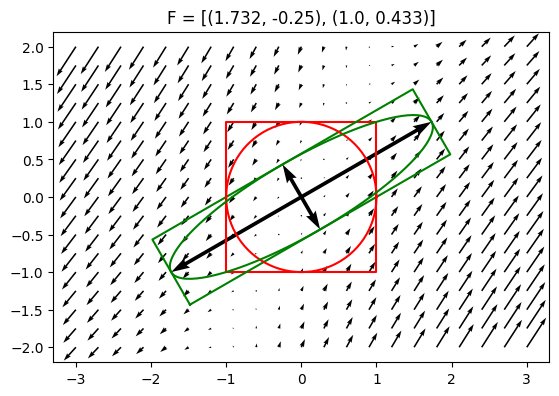

In [2]:
F = defgrad2([[1.732, -0.25], [1, 0.433]])
plot_defgrad(F)

## Polar decomposition

We therefore postulate without proof that the deformation gradient tensor can be decomposed into stretch multiplied by rotation. We therefore can write this decomposition as:

$$\boldsymbol{F} = \boldsymbol{R} \cdot \boldsymbol{U}$$

where $\boldsymbol{R}$ is the **rotation matrix**, and $\boldsymbol{U}$ is the
**right stretch tensor**. Note that the process is read from
right to left, not left to right. $\boldsymbol{U}$ is applied first, then $\boldsymbol{R}$.

The deformation gradient from above example could be decomposed as:

$$\boldsymbol{F} = \begin{bmatrix} 1.732 & -0.25 \\ 1 & 0.433 \end{bmatrix} \approx
\begin{bmatrix} \cos(30^\circ) & -\sin(30^\circ) \\ \sin(30^\circ) & \cos(30^\circ) \end{bmatrix}
\begin{bmatrix} 2 & 0 \\ 0 & 0.5 \end{bmatrix}$$

In [3]:
U = defgrad2([[2, 0], [0, 0.5]])
a = np.deg2rad(30)
R = defgrad2([[np.cos(a), -np.sin(a)],
              [np.sin(a), np.cos(a)]])
F = R @ U
print(F)

DeformationGradient2
[[ 1.732 -0.25 ]
 [ 1.     0.433]]


The deformation gradient tensor can be equally-well decomposed into rotation multipled by stretch as:

$$\boldsymbol{F} = \boldsymbol{V} \cdot \boldsymbol{R}$$

where $\boldsymbol{R}$ is the same **rotation matrix**, and $\boldsymbol{V}$ is the **left stretch tensor**.

The deformation gradient from above example could be decomposed as:

$$\boldsymbol{F} = \begin{bmatrix} 1.732 & -0.25 \\ 1 & 0.433 \end{bmatrix} \approx
\begin{bmatrix} 1.625 & 0.65 \\ 0.65 & 0.875 \end{bmatrix}
\begin{bmatrix} \cos(30^\circ) & -\sin(30^\circ) \\ \sin(30^\circ) & \cos(30^\circ) \end{bmatrix}$$

Such a partitioning of the **deformation gradient** into the product of a **rotation matrix** and **stretch tensor** is known as a **polar decomposition**.

## Rotation matrix

````{admonition} Derivation of 2D rotation matrix
:class: tip
```{image} figures/2drotation.png
:alt: 2D rotation
:class: bg-primary mb-1
:width: 50%
:align: center
```

In order to rotate unit vector $\boldsymbol{\hat{u}} = (u_1, u_2)$ to vector $\boldsymbol{\hat{v}} = (v_1, v_2)$ shown in figure, we can write following equations for $\cos(\alpha)$, $\sin(\alpha)$, $\cos(\alpha +\beta )$ and $\sin(\alpha + \beta)$:

$$\cos(\alpha) = u_1\text{, } \sin(\alpha) = u_2$$

$$\cos(\alpha + \beta) = v_1\text{, } \sin(\alpha + \beta) = v_2$$

Substituting to the sum of angles trigonometric identities:

$${\color{red} \cos(\alpha +\beta )}={\color{red} \cos \alpha} \cos \beta - {\color{red} \sin \alpha} \sin \beta$$

$${\color{red} \sin(\alpha +\beta )}={\color{red} \cos \alpha} \sin \beta + {\color{red} \sin \alpha} \cos \beta$$

we can write:

$$v_1 = u_1 \cos \beta - u_2 \sin \beta$$

$$v_2 = u_1 \sin \beta + u_2 \cos \beta$$

or in matrix form

$$\begin{bmatrix}v_1 \\ v_2\end{bmatrix} = \begin{bmatrix} \cos \beta & -\sin \beta \\ \sin \beta & \cos \beta \end{bmatrix} \begin{bmatrix}u_1 \\ u_2\end{bmatrix}$$

or

$$\boldsymbol{\hat{v}} = \boldsymbol{R} \cdot \boldsymbol{\hat{u}}$$
````

```{note}
Rotation matrices are **square matrices**, with real entries. More specifically, they can be characterized as **orthogonal matrices** with determinant 1; that is, a square matrix $\boldsymbol{R}$ is a rotation matrix if and only if $\boldsymbol{R}^T = \boldsymbol{R}^{-1}$ and $det(\boldsymbol{R}) = \left | \boldsymbol{R} \right | = 1$.
```

## Transformation of stretching tensors

It is relatively easy to develop a relationship between **left stretch tensor** $\boldsymbol{V}$ and **right stretch tensor** $\boldsymbol{U}$. Since $\boldsymbol{F} = \boldsymbol{V} \cdot \boldsymbol{R}$ and $\boldsymbol{F} = \boldsymbol{R} \cdot \boldsymbol{U}$, then:

$$\boldsymbol{V} \cdot \boldsymbol{R} = \boldsymbol{R} \cdot \boldsymbol{U}$$

and post-multiplying through by $\boldsymbol{R}^{T}$ gives 

$$\boldsymbol{V} \cdot \boldsymbol{R} \cdot \boldsymbol{R}^{T} = \boldsymbol{R} \cdot \boldsymbol{U} \cdot \boldsymbol{R}^{T}$$

But since $\boldsymbol{R} \cdot \boldsymbol{R}^{T} = \boldsymbol{R} \cdot \boldsymbol{R}^{-1} = \boldsymbol{I}$, this leaves 

$$\boldsymbol{V} = \boldsymbol{R} \cdot \boldsymbol{U} \cdot \boldsymbol{R}^{T}$$

as the relationship between $\boldsymbol{V}$ and $\boldsymbol{U}$. Alternatively, solving for $\boldsymbol{U}$ gives 

$$\boldsymbol{U} = \boldsymbol{R}^{T} \cdot \boldsymbol{V} \cdot \boldsymbol{R}$$

In [4]:
# Use above derived equation to calculate V
V = R @ U @ R.T
print(V)

DeformationGradient2
[[1.625 0.65 ]
 [0.65  0.875]]


In [5]:
# Test equality of left and right polar decomposition
V @ R == R @ U

True

## Singular value decomposition

In linear algebra, the singular value decomposition (**SVD**) is a factorization of a real or complex matrix $\boldsymbol{F} =\boldsymbol{U} {\boldsymbol {\Sigma }}\boldsymbol{V} ^{*}$. Thus the expression $\boldsymbol{U} {\boldsymbol {\Sigma }}\boldsymbol{V} ^{*}$ can be intuitively interpreted as a composition of three geometrical transformations:
 - **rotation or reflection**
 - **scaling**
 - and another **rotation or reflection**

```{image} figures/svd_interpreted.png
:alt: SVD interpreted
:class: bg-primary mb-1
:width: 75%
:align: center
```

---

Following code snippets demostrate SVD technique.

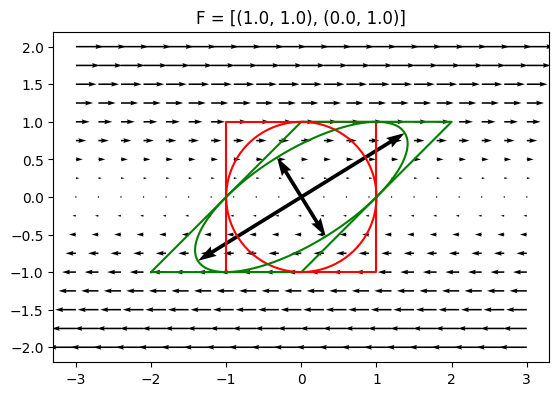

In [6]:
F = defgrad2([[1, 1], [0, 1]])  # deformation gradient
plot_defgrad(F)

We can calculate singular value decomposition using `numpy.linalg.svd` function. Note that stretching tensor is returned as 1D array representing diagonal of stretching tensor:

In [7]:
U, s, V = np.linalg.svd(F)

We can visualize individual deformation components:

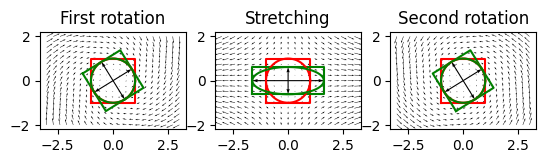

In [8]:
fig, axs = plt.subplots(1, 3)
plot_defgrad(V, ax=axs[0], title='First rotation')
plot_defgrad(np.diag(s), ax=axs[1], title='Stretching')
plot_defgrad(U, ax=axs[2], title='Second rotation')

In addition, we can use stretching tensor and second rotation matrix to calculate principal axes and orientation of strain ellipse:

In [9]:
# calculate axial ratio and orientation
ar = s[0] / s[1]
ori = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
print('Orientation:{:g} AR:{:g}'.format(ori, ar))

Orientation:31.7175 AR:2.61803
